In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train = train.drop(['PassengerId','Name','Ticket'], axis = 1)


In [12]:
train = train.drop('Cabin', axis = 1)

In [13]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
test = test.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)


In [10]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [19]:
#train 컬럼별 null값 확인
#나이는 평균값으로 채우고
#중간정착항구는 N으로 채우기
train.isnull().sum()

train['Age'].fillna(train['Age'].mean(), inplace = True)
train

train['Embarked'].fillna('N', inplace = True)
train

# train.isnull().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [20]:
#성별변수를 이진변수로 변환
train['Sex'] = train['Sex'].apply(lambda x : 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [21]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [ ]:
#상관관계 그래프 확인

In [22]:
train.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5148\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5148\2534585298.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True) # 상관 관계 행렬 계산


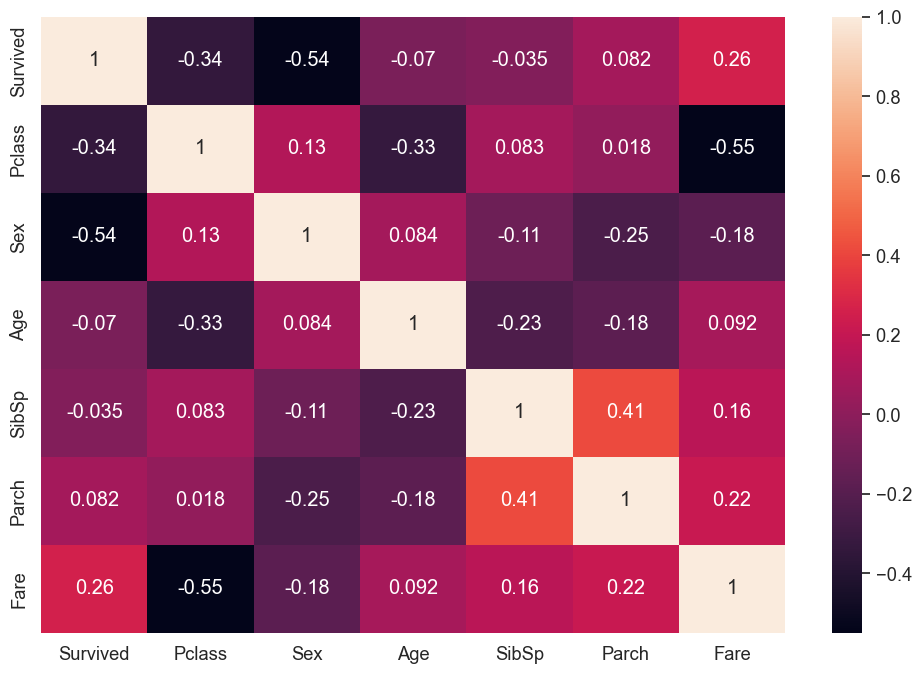

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True) # 상관 관계 행렬 계산
plt.show()

In [28]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [30]:
#범주형 변수 더미화
#.get_dummies 범주형 변수들에 대해 더미 변수를 생성함, 범주형변수가 이진변수로 변환된다
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,NaN,0,0,8.0500,0,0,1


In [31]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0,0


In [33]:
X_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

In [66]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0,0
2,3,0,26.000000,0,0,7.9250,0,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,0,1
888,3,0,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0,0


In [67]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
#모델 생성 (로지스틱회귀분석)

lr = LogisticRegression()

#모델 학습
lr.fit(X_train,y_train)

D:\AI_14_kjw\resorce\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#예측
pred = lr.predict(X_train)

#정확도 평가
acc = accuracy_score(y_train, pred)
print(acc)

0.8013468013468014


# 레이블 인코딩 (Label Encoding)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
color = ['red', 'green', 'blue', 'black','red','green']

#LableEncoder 생성, 적용
le = LabelEncoder()
le_color = le.fit_transform(color)

print(color)
print(f"레이블 인코딩 후 : {le_color}")
#각 범주를 숫자로 변환하여 처리

['red', 'green', 'blue', 'black', 'red', 'green']
레이블 인코딩 후 : [3 2 1 0 3 2]


 # 원- 핫 인코딩(One-Hot Encoding)

In [48]:
import pandas as pd

In [54]:
data= {'color':['red', 'green', 'blue', 'black','red','green']}

df = pd.DataFrame(data)
df

oh_color = pd.get_dummies(df, columns = ['color'])
print(df)
#print(f"원-핫 인코딩 후 : {oh_color}")
print(oh_color)

   color
0    red
1  green
2   blue
3  black
4    red
5  green
   color_black  color_blue  color_green  color_red
0            0           0            0          1
1            0           0            1          0
2            0           1            0          0
3            1           0            0          0
4            0           0            0          1
5            0           0            1          0


# 로지스틱 회귀 모델 생성
 * 하이퍼 파라미터 적용

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 100)

In [71]:
lr.fit(train,y_train)

pred = lr.predict(test)

acc = accuracy_score(y_train, pred)
print(acc)

D:\AI_14_kjw\resorce\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Embarked_N
- Survived
